### Reviewing Graphs/Plots with `Matplotlib`

We get more flexibility with creating graphs, plots, and charts...

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Let's import our dataset

Boston = pd.read_csv("https://raw.githubusercontent.com/sha256rma/foundations-of-data-science/refs/heads/main/datasets/Boston%20House%20Prices.csv")

In [15]:
Boston.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


- `std` tells us how spread apart our data is. smaller values mean we have little variance between values.
- `50%` is the median. (2nd Quartile)
- `25%` is the 1st quartile (median of the lower half of the data)
- `75%` is the 3rd quartile (median of the upper half of the data)

Can we tell if the `Distance` column follows a normal distribution from the above statistics?
- Yes, but not obvious...

## Boxplot
It visualizes the `5-figure summary`
1. Minimum
2. 1st Quartile (25%)
3. Median 
4. 3rd Quartile (75%)
5. Maximum

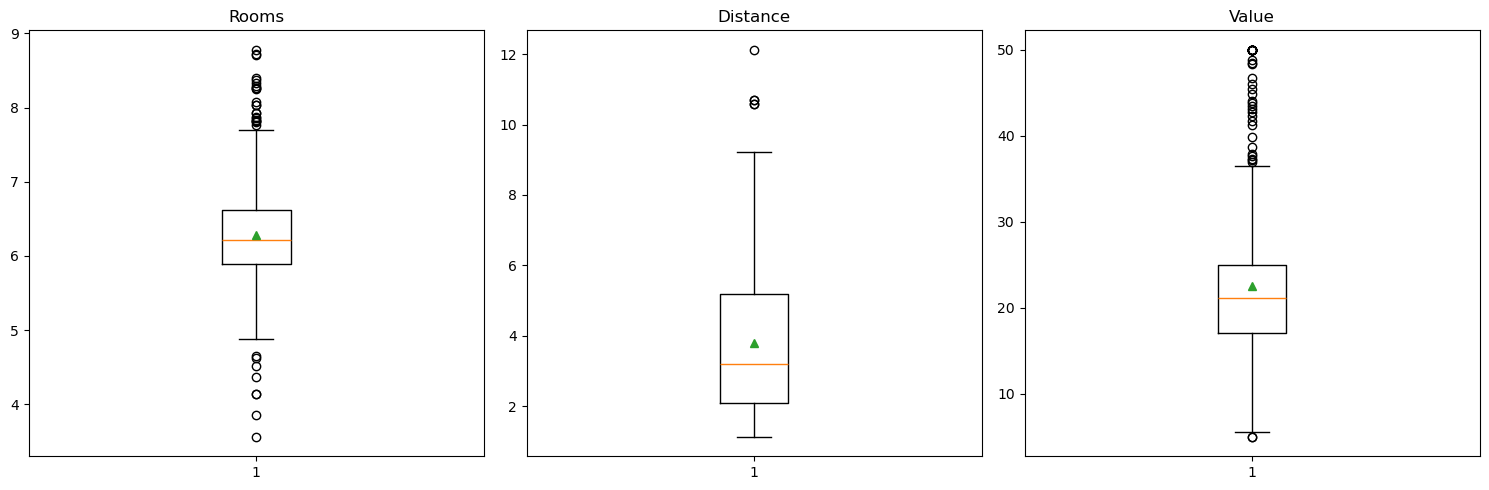

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15,5)) # sharey=True

# We will create a boxplot for the first, second, and third column

# Array example: [1,2,3,4,5]

# We have to do the same steps three times.
# Is there a way we can reduce the lines of code? Yes, we can use a `for loop`


for number in range(0, 3):
    ax = axes[number]
    # How do I see my column names?
    column = Boston.columns[number]
    ax.boxplot(Boston[column], showmeans=True)
    ax.set_title(column)

# We want to ensure that if we compare two or more plots, they share the same scaling.
plt.tight_layout()
plt.savefig('boxplot_for_all_columns.png')
plt.show()

# Understanding the Boxplot

It has 5 statistics:
1. Minimum: What is the smallest data point within 1.5 times the IQR?
2. First Quartile (Q1): 25% of the data
3. Median (Q2): 50% of the data
4. Third Quartile (Q3): 75% of the data
5. Maximum: What is the largest data point within 1.5 times the IQR?

### What are the dots above and below the min/max?

They are outliers. In a boxplot, the outliers are the points that fall outside 1.5 x range between Q3 and Q1

range between Q3 and Q1 --> Inter-Quartile Range (IQR)

### What can we tell from the boxplot?

If the boxplot looks ~ symmetrical, then it is close to following a normal distribution. (The length of the whiskers are about the same and the outliers on both ends are about the same)

## We want to check if any one of our columns follows a normal distribution
1. For each column, we want to graph a histogram
2. In each column's histogram, we want to graph the normal distribution line

![Normal Distribution Formula](https://www.investopedia.com/thmb/vEnFyFaX2zK96wVerxokPmEt3dU=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Clipboard01-fdb217713438416cadafc48a1e4e5ee4.jpg)

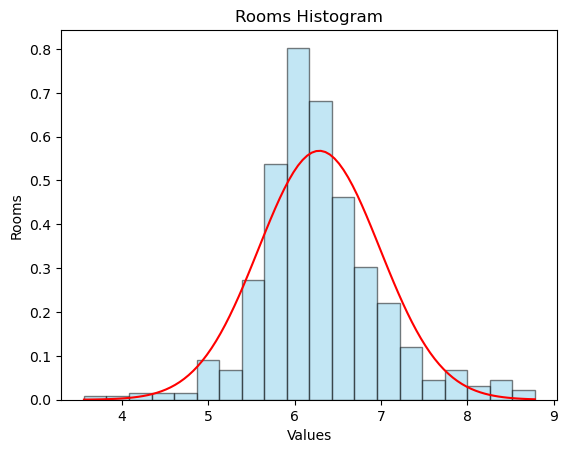

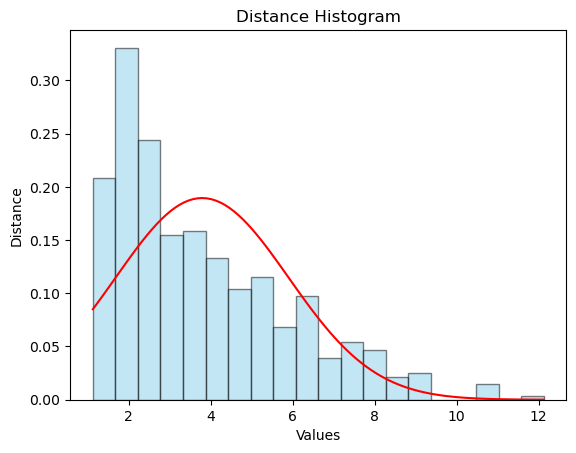

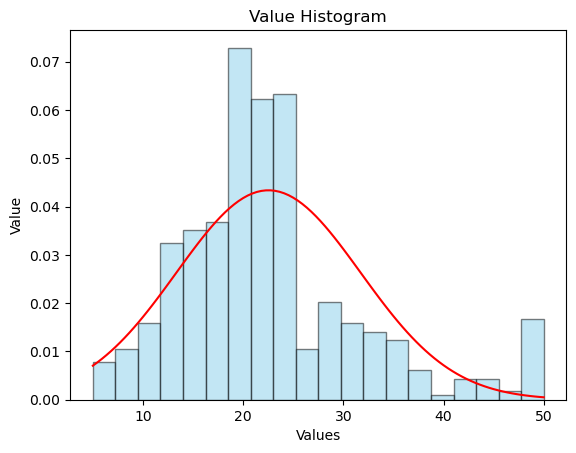

In [66]:
import numpy as np # we will use this for various math functions

for column in Boston.columns:
    plt.figure()

    # Step 1: We plot our histogram
    plt.hist(Boston[column], bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.5)

    # Step 2: Plot the normal distribution line on top of our histogram
    # We can represent the normal distribution curve mathematically
    mean = Boston[column].mean()
    std = Boston[column].std()
    x = np.linspace(Boston[column].min(), Boston[column].max(), 100)
    f = np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))

    plt.plot(x, f, color='red')

    plt.title(f'{column} Histogram')
    plt.xlabel('Values')
    plt.ylabel(column)

## ^ We used `.describe()` to get summary startistics for numerical columns
Note: `.describe()` only gives statistics for `integer` or `float` columns

In [10]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     506 non-null    float64
 1   Distance  506 non-null    float64
 2   Value     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


If you have commas or special charcaters like $, then you must sanitize the value to only have numbers...

In [13]:
Boston.sample(5)

,Rooms,Distance,Value
351,6.579,10.7103,24.1
273,7.691,4.3665,35.2
178,6.860,2.9153,29.9
504,6.794,2.3889,22.0
106,5.836,2.2110,19.5


### Our plot will have:
- `Rooms` as the X axis
- `Value` as the y axis
- We will use `Distance` to distinguish between points (e.g. Distance < 5)

In [16]:
X = Boston['Rooms']
y = Boston['Value']
distance = Boston['Distance']

### We'll start plotting with `plt` (Bad Example)

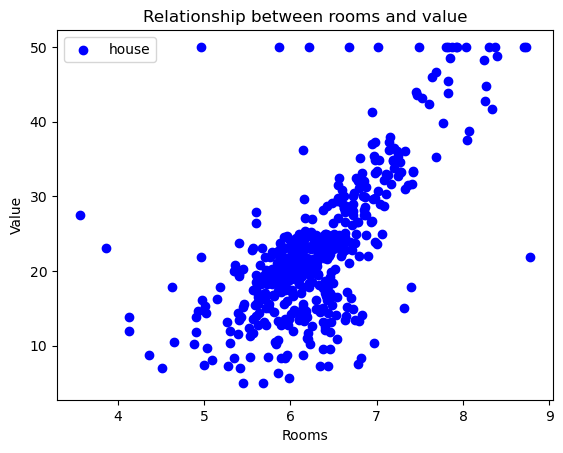

In [28]:
plt.scatter(X, y, color='blue', label="house")

plt.xlabel("Rooms")
plt.ylabel("Value")
plt.title("Relationship between rooms and value")

plt.legend()
plt.show()

In [34]:
above_threshold = distance > 3.0
below_threshold = distance <= 3.0

To incorporate the distaance thresholds in our graph, we have to graph both thresholds: `above` and `below` independently and then overlay them on top of each other 

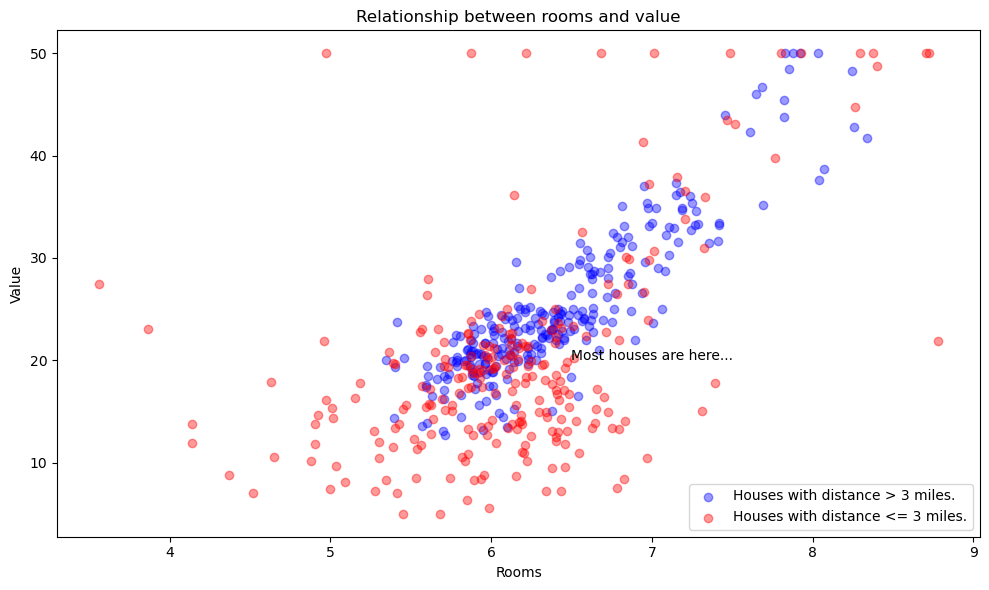

In [53]:
plt.figure(figsize=(10,6))

plt.scatter(X[above_threshold], y[above_threshold], color='blue', alpha=0.4, label="Houses with distance > 3 miles.")
plt.scatter(X[below_threshold], y[below_threshold], color='red', alpha=0.4, label="Houses with distance <= 3 miles.")

plt.annotate("Most houses are here...", xy=(6.5, 20), xytext=(6.5, 20))

plt.xlabel("Rooms")
plt.ylabel("Value")
plt.title("Relationship between rooms and value")

plt.legend()

#small trick to make graph pretty
plt.tight_layout()

plt.show()